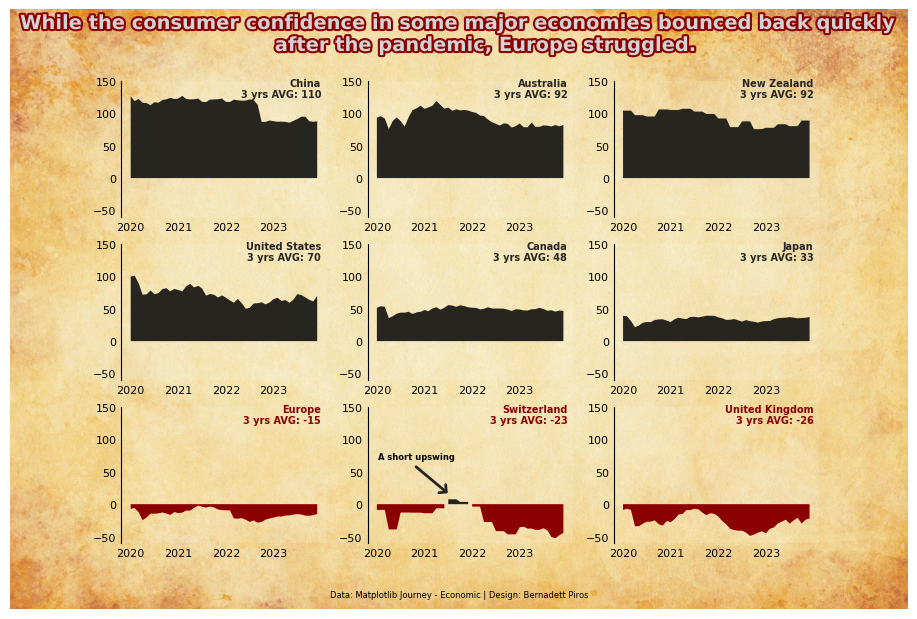

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from drawarrow import ax_arrow, fig_arrow
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from matplotlib.patches import PathPatch
import matplotlib.patheffects as path_effects
from matplotlib.patches import Polygon
from PIL import Image

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/economic/economic.csv"
df = pd.read_csv(url)

avg_cc_df = df.groupby(["country"]).agg(avg_cc=("consumer confidence", "mean")).reset_index()    
avg_cc_df = avg_cc_df.sort_values(by=["avg_cc"], ascending=False, ignore_index=True)
df1 = df.merge(avg_cc_df, on="country", how="left")

img = Image.open("pergamen.jpg")

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 6))

for ax in axs.flat:
    ax.patch.set_alpha(0.1) 
    
bg_ax = plt.axes([0, 0, 1, 1]) 
bg_ax.set_zorder(-1) 
bg_ax.imshow(img) 
bg_ax.axis("off")

countries = avg_cc_df["country"].unique()

for country, ax in zip(countries, axs.flat):
    subset = df1[df1["country"] == country]
    x = subset["date"]
    h = subset["consumer confidence"]
    v = subset["avg_cc"].unique().astype(int)
    ax.fill_between(x, h, where=h>=0, facecolor="#27251F")
    ax.fill_between(x, h, where=h<0, facecolor="#8b0000")
    c = "#27251F" if v.item() > 0 else "#8b0000"
    ax.text(x="2023-12-31", y=125, s=f"{country.title()}\n3 yrs AVG: {v.item()}", color=c, size=7, weight="bold", ha="right")
    ax.set_ylim(-60, 150)
    location = ["2020-01-01", "2021-01-01", "2022-01-01", "2023-01-01"]
    labels = ["2020", "2021", "2022", "2023"]
    ax.set_xticks(location, labels=labels)
    ax.tick_params(length=0, labelsize=8)
    ax.spines[["top", "bottom", "right"]].set_visible(False)

fig_arrow(
   tail_position=[0.45, 0.24],
   head_position=[0.49, 0.19],
   color="#27251F",
   width=2,
   fill_head=False,
   head_width=3.8,
   head_length=3.7   
)

fig.text(0.41, 0.25, "A short upswing", size=6, weight="bold")

txt='''While the consumer confidence in some major economies bounced back quickly
        after the pandemic, Europe struggled.''' 

t = fig.text(0.5, 0.93, s=txt, ha="center", size=14, weight="bold", color="lightgrey")
t.set_path_effects([path_effects.Stroke(linewidth=3, foreground="#8b0000"),
                       path_effects.Normal()])

fig.text(0.5, 0.02, "Data: Matplotlib Journey - Economic | Design: Bernadett Piros",
         size=6, ha="center")
    
plt.show()

#plt.savefig("fill_between_bg_economic", dpi=300, bbox_inches='tight', pad_inches=0.2)